In [1]:
import numpy as np
phases = np.random.rand(2**4)
diag = np.exp(1j * phases)
phases

array([0.76970497, 0.7671278 , 0.63454326, 0.71644253, 0.82734194,
       0.47658422, 0.30802111, 0.18491769, 0.01311032, 0.31827293,
       0.90417115, 0.53082275, 0.83663564, 0.39470312, 0.73046661,
       0.21978749])

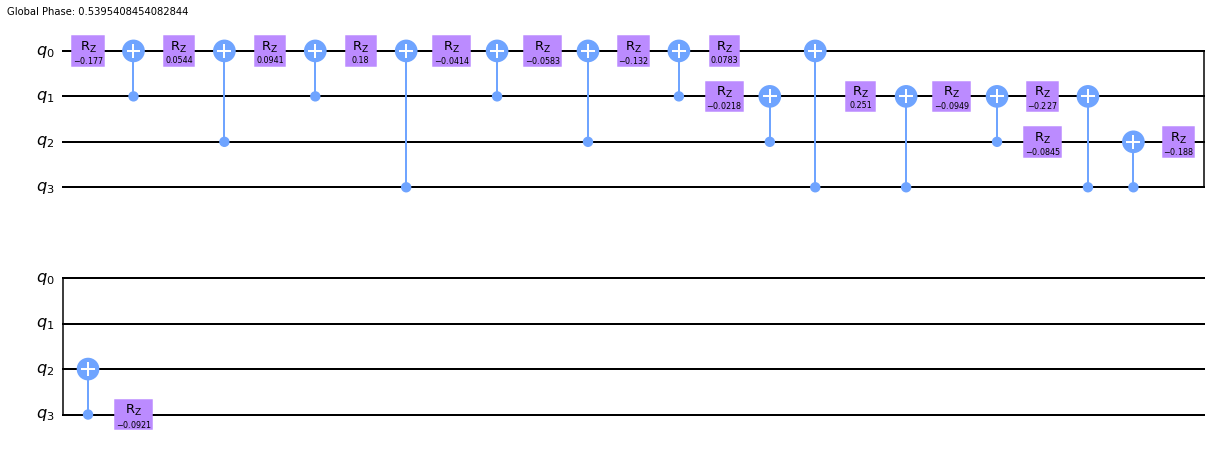

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import Diagonal

circ = QuantumCircuit(4)
circ.append(Diagonal(diag), circ.qubits)
circ.decompose(reps=4).draw("mpl")

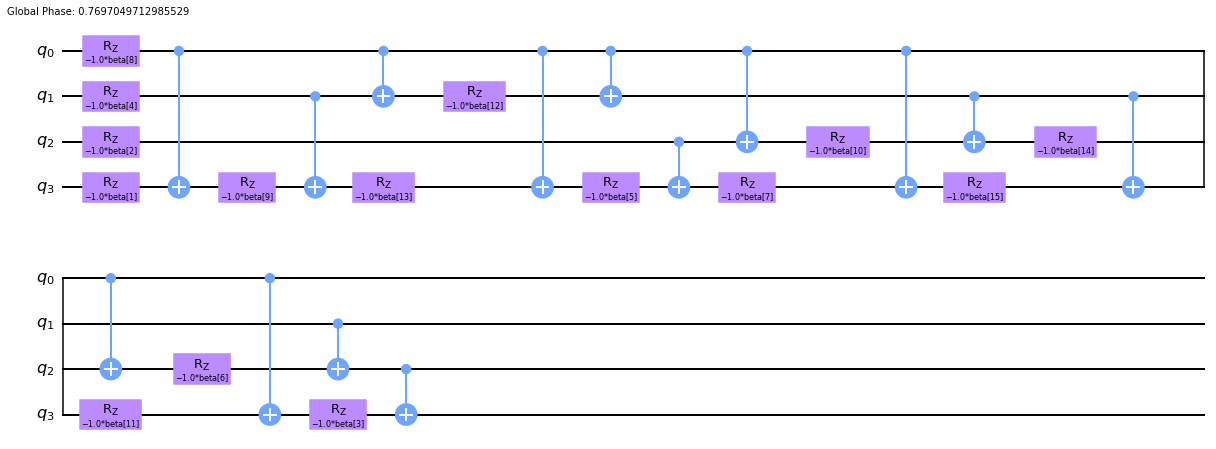

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit.library.generalized_gates.diagonal_new import DiagonalNew

circ = QuantumCircuit(4)
circ.append(DiagonalNew(diag), circ.qubits)
circ.decompose(reps=2).draw("mpl")

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit.library.generalized_gates.diagonal_new import DiagonalNew
from qiskit.circuit import ParameterVector

beta = ParameterVector("beta", 4)
beta = [beta[0], beta[1], beta[2], beta[3]]

circ = QuantumCircuit(4)
circ.append(DiagonalNew(diag), circ.qubits)
circ.decompose(reps=2).draw("mpl")

NameError: name 'diag' is not defined

In [1]:
from qiskit.quantum_info import Statevector, Operator
from qiskit.quantum_info.operators.predicates import matrix_equal
from qiskit.circuit.library.generalized_gates.diagonal_new import DiagonalNew
import numpy as np

testdata = (
    # [0, 0],
    # [0, 0.8],
    [0, 0, 1, 1],
    [0, 1, 0.5, 1],
    (2 * np.pi * np.random.rand(2**3)),
    (2 * np.pi * np.random.rand(2**4)),
    (2 * np.pi * np.random.rand(2**5)),
)
def test_diag_gate(phases):
    """Test correctness of diagonal decomposition."""
    diag = [np.exp(1j * ph) for ph in phases]
    qc = DiagonalNew(diag)
    simulated_diag = Statevector(Operator(qc).data.diagonal()).data
    ref_diag = Statevector(diag).data
    print(simulated_diag)
    print(ref_diag)

    assert matrix_equal(simulated_diag, ref_diag, ignore_phase=False)

for test in testdata:
    print("test:", test)
    test_diag_gate(test)

test: [0, 0, 1, 1]
[0.54030231-0.84147098j 0.54030231+0.84147098j 0.54030231-0.84147098j
 0.54030231+0.84147098j]
[1.        +0.j         1.        +0.j         0.54030231+0.84147098j
 0.54030231+0.84147098j]


AssertionError: 